# Part I - (Ford Gobike data exploration)
## by (Abdullahi Abogun)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It contains anonymized data of users for an approximate 183,000 trips, inluding duration and other attributes 




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load dataset into pandas dataframe
ford_gobike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#Overview of bike data
print(ford_gobike.shape)
print(ford_gobike.info())
print(ford_gobike.duplicated().sum())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

In [4]:
ford_gobike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [5]:
ford_gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

The dataset has 183,412 trips with 16 features which includes; duration,start time,start station name, user type,member gender among others. The dataset contains mostly numeric variables but also inlude categorical(gender, user type) variables.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in finding out what features are best for predicting the duration of trips taken in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that time of day, and day of week will have the strongest would have the greatest indication, as weather, lighting and traffic may be factors to consider before opting for a bike ride. I also think Gender, user type and Age may be good indicators too.

## Univariate Exploration


Starting with the duration variable. I will be creating a column for duration in minutes and rounding the values to make the duration more intuitive

In [6]:
#create a column for duration in minutes
ford_gobike['duration_min'] = (ford_gobike['duration_sec']/60).round(0).astype(int)
ford_gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,870
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,709
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1031
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26


In [7]:
ford_gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,12.101340
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,29.908512
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,1.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,5.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,9.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,13.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,1424.000000


(0.0, 200.0)

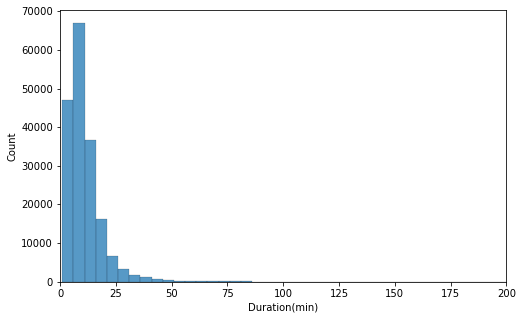

In [8]:
#plot a histogram of duration in minutes
bin_size = 5
bins = np.arange(1,ford_gobike['duration_min'].max()+5,bin_size)

plt.figure(figsize = [8,5])
sb.histplot(data = ford_gobike,x = 'duration_min',bins = bins)
plt.xlabel('Duration(min)')
plt.xlim(0,200)

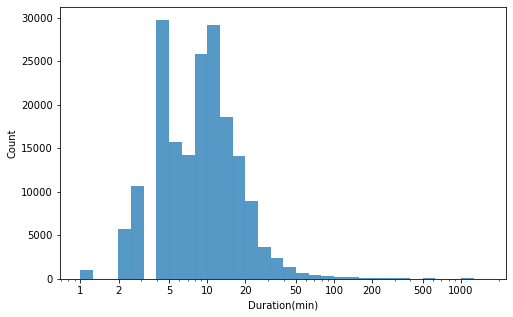

In [9]:
bin_size = 0.1
bins = 10 ** np.arange(0,np.log10(ford_gobike['duration_min'].max())+0.1,bin_size)

plt.figure(figsize = [8,5])
sb.histplot(data = ford_gobike,x = 'duration_min',bins = bins)
plt.xscale('log')
plt.xticks([1,2,5,10,20,50,100,200,500,1000],[1,2,5,10,20,50,100,200,500,1000])
plt.xlabel('Duration(min)');


Duration has a right skewed distribution with a large number of small values and a few numbers of high values. When plotted on a log scale we see 2 breaks between 1 and 4, and 2 peaks between 4 and 20 minutes. 

The next variable of interest is the start time. This column contains information that can be extracted into multiple columns and then used for analysis. I will be using the data extracted in the next series of plots

In [10]:
#Extract date and time from starttime column and remove seconds from the time column
ford_gobike[['date','time']] = ford_gobike['start_time'].str.split(' ',expand = True)
ford_gobike[['time_new','seconds']] = ford_gobike['time'].str.split('.',expand = True)
ford_gobike.drop(['time','seconds'],axis = 1,inplace =True)
ford_gobike.date = pd.to_datetime(ford_gobike.date)

In [11]:
#create columns for day of the week,and time of the day from date and time columns
ford_gobike['day_of_week'] = ford_gobike.date.dt.day_name()

#Order days of week as it has an intrisic ordering to it.
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ordered_days = pd.api.types.CategoricalDtype(ordered = True, categories = days)
ford_gobike['day_of_week'] = ford_gobike['day_of_week'].astype(ordered_days);

In [12]:
#Extract hour from the time to get time of day
ford_gobike['hour'] = ford_gobike['time_new'].str.split(':',expand = True)[0].astype(int)

hours = [0,5.9,11.9,17.9,24]
bin_names = ['Midnight','Morning','Afternoon','Night']
ford_gobike['time_of_day'] =pd.cut(ford_gobike['hour'],hours,labels = bin_names)
ford_gobike.drop('hour', axis = 1, inplace = True)

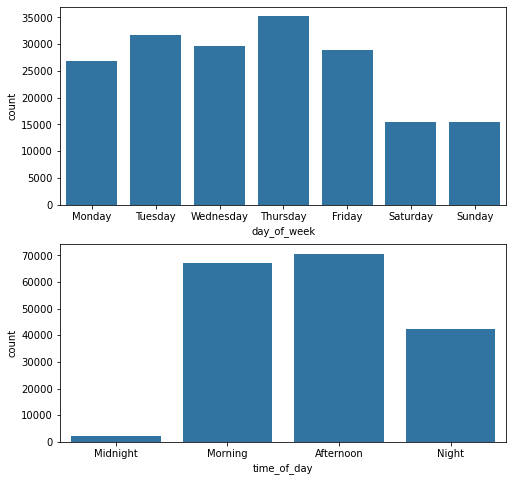

In [13]:
#plot a bar chart of both days of the week and time of the day to see their influence on trips
#Create a function for bar chart has there are mostly categorical data to plot and the countplot may be required multiple times
def countplot(data,x,**kwargs):
    base_color = sb.color_palette()[0]
    sb.countplot(data = data,x=x,color = base_color)


plt.figure(figsize=[8,8])

plt.subplot(2,1,1)
countplot(ford_gobike,'day_of_week')

plt.subplot(2,1,2)
countplot(ford_gobike,'time_of_day')

We would see that the plot above depicts that most trips are taken on Thursdays,Tuesdays and Fridays,while the least number of trips happen on saturdays and sundays. We will look more into this to see if any of the other variables affect this outcome. The time of day chart also shows that most trips are taken in the Afternoon and morning.

I will be looking at the other variables to see what information can be revealed. Lets see the category of users with the most trips

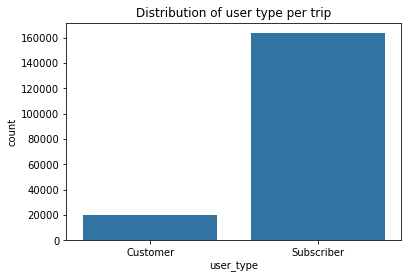

In [14]:
countplot(ford_gobike,'user_type')
plt.title('Distribution of user type per trip');

clearly we could see that the most trips are taken by subscribers and only a little chunk compared to the total are taken by customers. This would further be explored in the bivariate section to see if it subscribers have a relationship between age or gender.

The member birthyear will be more useful if we can get member age, since the data was gotten in 2019, this can be calculated

In [15]:
#create a column for member age
ford_gobike['age'] = 2019 - ford_gobike['member_birth_year'] 

In [16]:
ford_gobike.age.describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

There are couple of missing values for the age and i intend to replace them with the average age due to other information that may be contained in the column, i can also see that the max age is 141yrs, a person this old would not have the strenght to ride a bike, so i will check and also replace.

In [17]:
#Replace null values and outliers with average age
ford_gobike.age = ford_gobike.age.fillna(34)

I will be pegging the users maximum age to 100, assuming a user older than this age cannot ride, therefor replacing with the average age

In [18]:
#replace age greater than 100 with average age
ford_gobike.loc[ford_gobike['age'] >= 100 , 'age'] = 34

In [19]:
ford_gobike.age.describe()

count    183412.000000
mean         34.151560
std           9.742857
min          18.000000
25%          27.000000
50%          32.000000
75%          38.000000
max          99.000000
Name: age, dtype: float64

In [20]:
#create an age distribution from the age column
age_bin = [18,35,55,70,99]
bin_names = ['Young adult','Adult','Old','Elderly']
ford_gobike['age_distribution'] =pd.cut(ford_gobike['age'],age_bin,labels = bin_names)

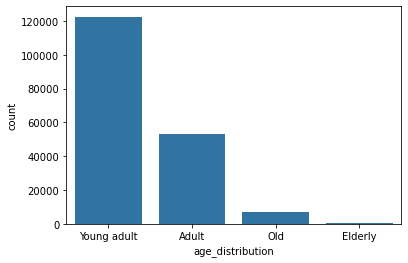

In [21]:
#plot age distribution data
countplot(ford_gobike,'age_distribution')

The Age distribution chart shows a drop in trips with an increase in age, trips are taken majorly by young adult, this may seem to be the case as riding may require energy levels not available to the old.

I will be looking at the next variable member_gender. I will also not be dropping null columns in gender because of the data in other column, so i will be replacing null values with dominant gender.

In [22]:
ford_gobike.groupby('member_gender').count()['duration_sec']

member_gender
Female     40844
Male      130651
Other       3652
Name: duration_sec, dtype: int64

I will also not be replacing the 'Other' member_gender assuming there are people that wish to be identified in another way.

In [23]:
ford_gobike.member_gender.isnull().value_counts()

False    175147
True       8265
Name: member_gender, dtype: int64

In [24]:
ford_gobike.member_gender = ford_gobike.member_gender.fillna('Male')

In [25]:
ford_gobike.member_gender.isnull().value_counts()

False    183412
Name: member_gender, dtype: int64

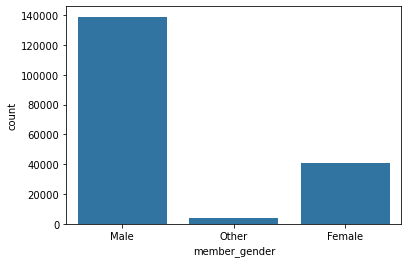

In [26]:
#Plot gender distribution
countplot(ford_gobike,'member_gender')

More than 3 times more trips are taken by males compared to females.This again may be due to the physicality involved in riding.

lets take a look at the start station.

In [27]:
ford_gobike.start_station_name.nunique()

329

There are 329 stations,thats a lot of data to plot in a single chart, so i will be taking a look at the top and bottom 20 by trips

In [28]:
top_20 = ford_gobike['start_station_name'].value_counts()[:20].index

In [29]:
ford_gobike_top20 = ford_gobike.loc[ford_gobike['start_station_name'].isin(top_20)]
ordered_stations = pd.api.types.CategoricalDtype(ordered = True, categories = top_20)
ford_gobike_top20['start_station_name'] = ford_gobike_top20['start_station_name'].astype(ordered_stations)

C:\Users\hp\AppData\Local\Temp\ipykernel_12988\2669152989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ford_gobike_top20['start_station_name'] = ford_gobike_top20['start_station_name'].astype(ordered_stations)


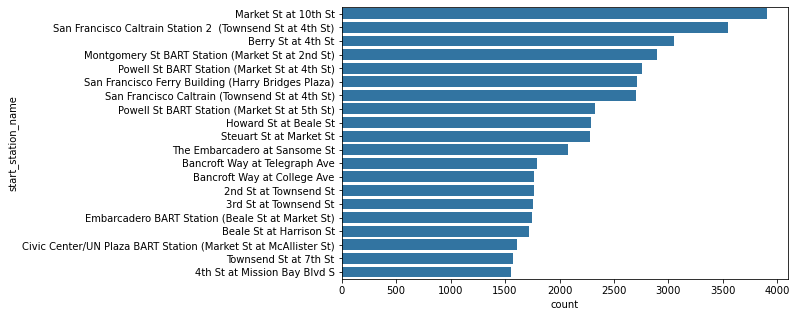

In [30]:
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[0]
sb.countplot(data = ford_gobike_top20, y = 'start_station_name', color = base_color);

In [31]:
bottom_20 = ford_gobike['start_station_name'].value_counts()[309:].index
ford_gobike_bottom_20 = ford_gobike.loc[ford_gobike['start_station_name'].isin(bottom_20)]
orderedb_stations = pd.api.types.CategoricalDtype(ordered = True, categories = bottom_20)
ford_gobike_bottom_20['start_station_name'] = ford_gobike_bottom_20['start_station_name'].astype(orderedb_stations)

C:\Users\hp\AppData\Local\Temp\ipykernel_12988\1609904172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ford_gobike_bottom_20['start_station_name'] = ford_gobike_bottom_20['start_station_name'].astype(orderedb_stations)


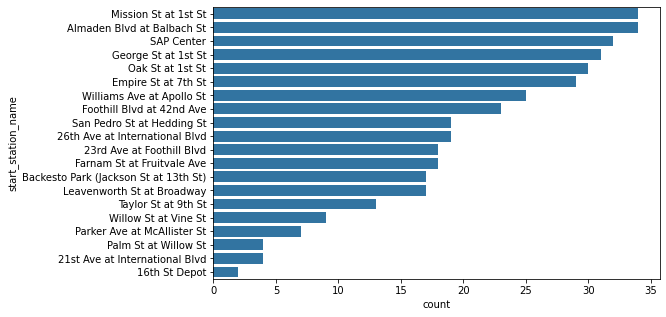

In [32]:
plt.figure(figsize=[8,5])
sb.countplot(data = ford_gobike_bottom_20, y = 'start_station_name', color = base_color);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration dustribution is right skewed hence i used log transform to look at the data. Under the log transform the data looked bimodal with peaks between 4 and 5 minutes and another between 10 and 15 minutes

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

To get the time of day, day of week, age and minutes data which were more informative than using the raw data i had to extract information from the start time using the date time library and also performing small calculations to arrive at age and minutes. I also had to fill in missing age with the average and missing gender with average gender to avoid loss of valuabel data in other columns.

## Bivariate Exploration

In [33]:
ford_gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,date,time_new,day_of_week,time_of_day,age,age_distribution
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,870,2019-02-28,17:32:10,Thursday,Afternoon,35.0,Young adult
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,Male,No,709,2019-02-28,18:53:21,Thursday,Night,34.0,Young adult
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,1031,2019-02-28,12:13:13,Thursday,Afternoon,47.0,Adult
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,608,2019-02-28,17:54:26,Thursday,Afternoon,30.0,Young adult
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,26,2019-02-28,23:54:18,Thursday,Night,45.0,Adult


I will start off with the main feature of interest and the feature i suppose will be the greatest indicator

<Figure size 1080x1080 with 0 Axes>

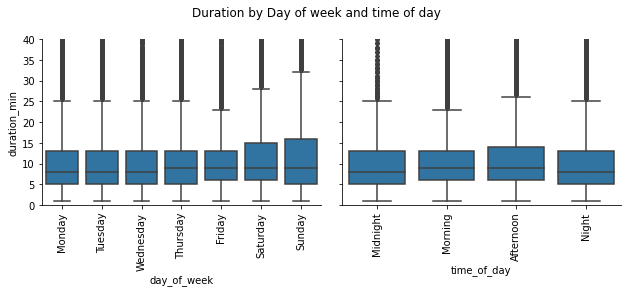

In [34]:
#create a function for box plot and make a plot of duration against day of week and time of day.
def boxplot(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)
    plt.xticks(rotation =90)

plt.figure(figsize = [15, 15])
g = sb.PairGrid(data = ford_gobike, y_vars = ['duration_min'], x_vars = ['day_of_week','time_of_day'],
                height = 3, aspect = 1.5)
g.fig.suptitle('Duration by Day of week and time of day', x =0.5,y= 1.1)
g.map(boxplot)
plt.ylim(0,40)
plt.show();

<Figure size 720x720 with 0 Axes>

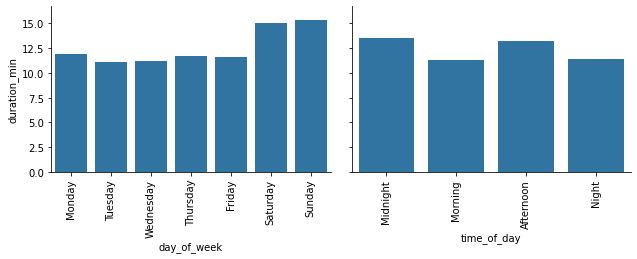

In [35]:
#Plot same data to have an undertsanding of its averages.
def barplot(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.barplot(x=x, y=y, color=default_color,errwidth = 0)
    plt.xticks(rotation =90)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = ford_gobike, y_vars = ['duration_min'], x_vars = ['day_of_week','time_of_day'],
                height = 3, aspect = 1.5)
g.map(barplot)
plt.show();

Although the visualizations in the univariate section depicts that less trips are taken over the weekend compared to other days of the week, the plot above suggest that rides are longer over the weekend compared to weekdays. Afternoon rides seem to have slightly longer durations than the other parts of the day. Although on average we see a close call between midnight rides and afternoon rides with morning and night rides drawing level. We would further look at this in the multivariate plot to see if there's an interesting relationship with age and usertype.

<Figure size 720x720 with 0 Axes>

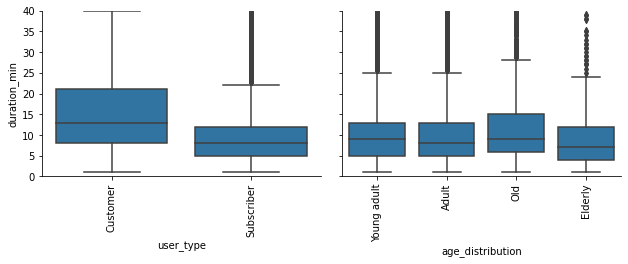

In [36]:
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = ford_gobike, y_vars = ['duration_min'], x_vars = ['user_type','age_distribution'],
                height = 3, aspect = 1.5)
g.map(boxplot)
plt.ylim(0,40)
plt.show();

Surprigsingly we see that even though there are more subscribers than customers, customers tend to spend more time on trips than subscribers, and we also see a surprising uptick in the amount of time old people according to the age distribution spend on rides.We would look at this to see if there's any relatioship between the old and the customer user type.

checking to see if there's a connection between age distribution and user type that explains the old spending longer time on trips.

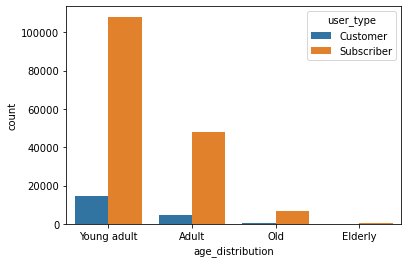

In [37]:
sb.countplot(data = ford_gobike,x = 'age_distribution',hue = 'user_type');

As earlier evident most people that take trips are subscribers and the majority of customers are young adults. 

The station might not say much about the duration but we would look at the top 20 stations and bottom 20 to see if we find anything interesting.

<AxesSubplot:xlabel='duration_min', ylabel='start_station_name'>

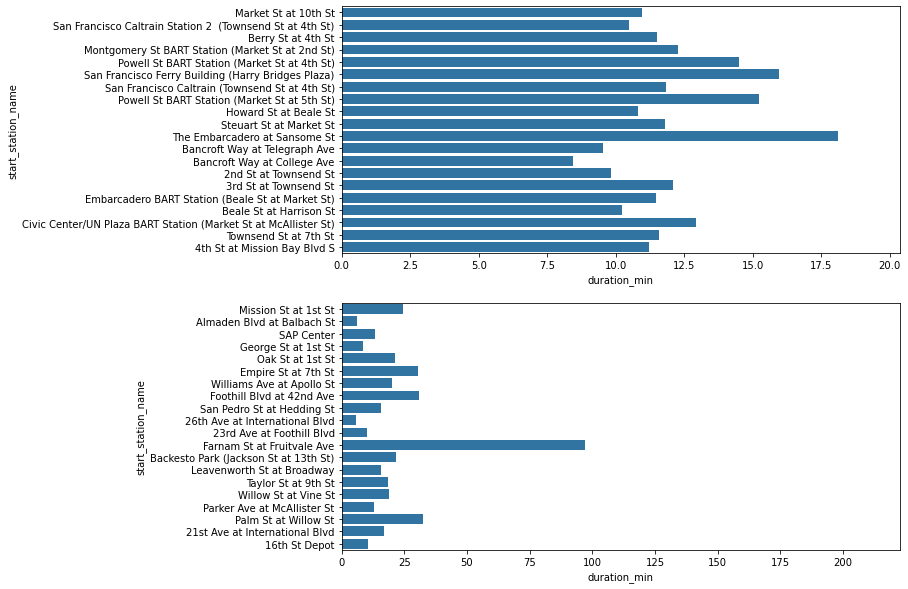

In [38]:
plt.figure(figsize = [10,10])
           
plt.subplot(2,1,1)
sb.barplot(data = ford_gobike_top20,x='duration_min', y = 'start_station_name',color = base_color,errwidth = 0)
           
plt.subplot(2,1,2)
sb.barplot(data = ford_gobike_bottom_20, x='duration_min', y = 'start_station_name',color = base_color,errwidth =0)

The top 20 stations typically maintains the average ride duration while the bottom 20 somewhat have longer rides. This maybe due to proximity to other stations but wouldn't be further checked.

I will be looking at how all the categorical features relates with each other

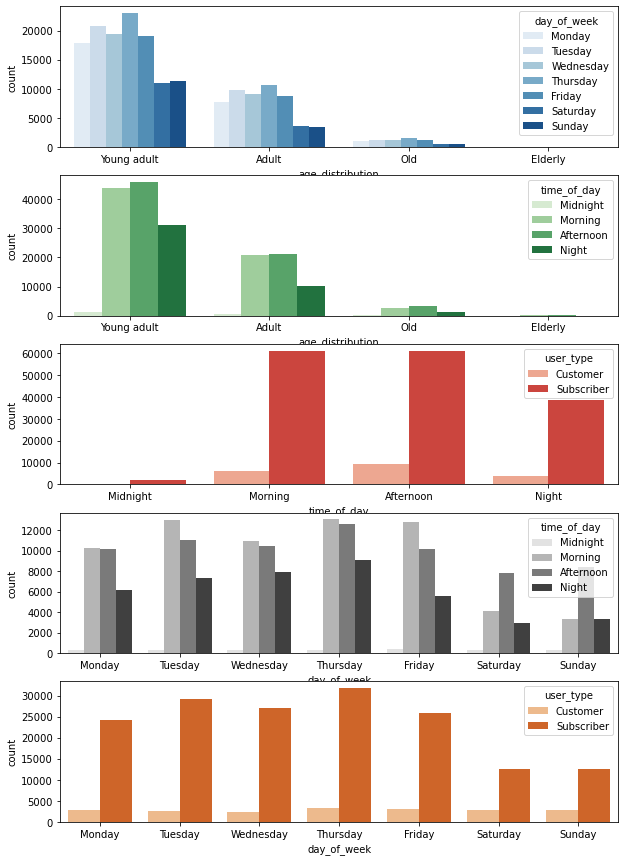

In [39]:
plt.figure(figsize=[10,15])

plt.subplot(5,1,1)
sb.countplot(data = ford_gobike,x = 'age_distribution',hue = 'day_of_week', palette = 'Blues');

plt.subplot(5,1,2)
sb.countplot(data = ford_gobike,x = 'age_distribution',hue = 'time_of_day', palette = 'Greens');

plt.subplot(5,1,3)
sb.countplot(data = ford_gobike,x = 'time_of_day',hue = 'user_type', palette = 'Reds');

plt.subplot(5,1,4)
sb.countplot(data = ford_gobike,x = 'day_of_week',hue = 'time_of_day', palette = 'Greys');

plt.subplot(5,1,5)
sb.countplot(data = ford_gobike,x = 'day_of_week',hue = 'user_type', palette = 'Oranges');

Generally we see trips are majorly taken in the morning and afternoon and mostly taken be young adults and adults that are subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Longer trips are taken during the weekend as suggested by the visualizations, compared to trips taken during weekdays,however,surprisingly longer trips are taken by customers as opposed to subscribers, and also the old age distribution seem to have the trips with the longer duration compared to the other age group.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Majority of the other features supports what was already seen from the univariate plot with the highest number of trips taken on thursdays in the afternoon by subscribers , with more young adults as subscribers taken trips compared to other age groups.

## Multivariate Exploration

The main thing to explore here is how features such as user type, age and gender key into the relationship between duration  and time of the week.

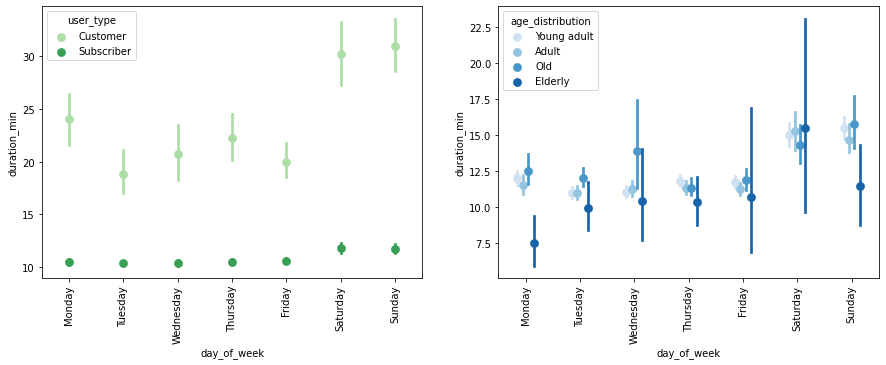

In [40]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sb.pointplot(data = ford_gobike,x = 'day_of_week', y = 'duration_min', hue = 'user_type',palette = 'Greens',linestyles = '')
plt.xticks(rotation =90)

plt.subplot(1,2,2)
sb.pointplot(data = ford_gobike, x = 'day_of_week',y = 'duration_min', hue = 'age_distribution',palette = 'Blues',linestyles ='',
            dodge = 0.3)
plt.xticks(rotation =90);

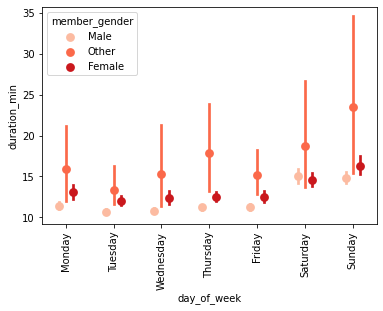

In [41]:
sb.pointplot(data = ford_gobike, x = 'day_of_week',y = 'duration_min', hue = 'member_gender',palette = 'Reds',linestyles ='',
            dodge = 0.3)
plt.xticks(rotation =90);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The major thing to see here is how typically subscribers maintain a relatively lesser trip duration compared to customers.We could also see that relatively,longer trips are taken by young adults.

### Were there any interesting or surprising interactions between features?

There wasnt any surprising interactions,It was just interesting to see that even tho there are typically more males than females, females generally spend longer duration on rides than males.

## Conclusions


Overall from the data we see typically rides take within 5 to 20 mins with an average of around 10 mins during the week and that number rises slightly during weekends. This uptick in minutes is majorly seen from customers rather than subscribers even though there are more subscribers than customers.During the course of the exploration we also see that majority of users are young adults and Thursday seem to be the most busy day of the week. To get this perspective i had to extract information from the birth year, duration in seconds and start to make the information more intuitive. I was also able to seperate the top 20 and bottom 20 station by trips and we see that the top station typically have users with the average trip duration, while the bottom 20 have riders whose rides are slightly outside the average duration.